In [48]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
font ={'size':12}
plt.rc('font',**font)



*Limpiar los datos del dataset*

In [2]:
datos=pd.read_csv('./dataset/train.csv')
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
datos.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Limpieza de las variables de edad y diligenciar datos vacios con edad promedio


In [6]:
promedioEdades=round(datos['Age'].mean())
datos['Age']=datos['Age'].fillna(promedioEdades)


In [7]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Diligenciar datos de cabina faltante con datos NE

In [8]:

datos['Cabin']=datos['Cabin'].fillna('NE')


In [9]:
datos['Cabin'].value_counts()

NE             687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Limpiar datos de embarque vacios

In [10]:
datos['Embarked']=datos['Embarked'].fillna('NE')
datos.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
datos['Embarked'].value_counts()

S     644
C     168
Q      77
NE      2
Name: Embarked, dtype: int64

Analisis de los datos modificados y mejora de legigibilidad de los datos

In [12]:
datos['Survived']=datos['Survived'].map({
    0: 'No',
    1: 'Yes'
})
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NE,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NE,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NE,S


In [13]:
datos['Embarked']=datos['Embarked'].map({
    'S': 'Southampton',
    'C': 'Cherbourg',
     'Q': 'Queenstown'
})
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NE,Southampton
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NE,Southampton
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NE,Southampton


**Graficacion y analisis de los datos encontrados en el data set**

Histograma de distribucion de las edades

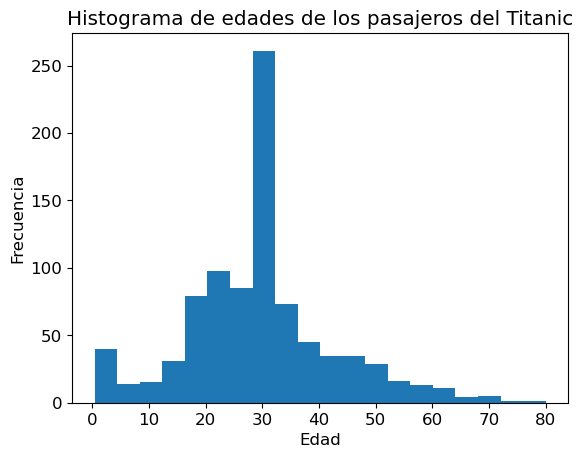

In [14]:
plt.hist(datos["Age"], bins=20)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de edades de los pasajeros del Titanic")
plt.show()

Diagrama de barras de los pasajeros que sobrevivieron segun su clase


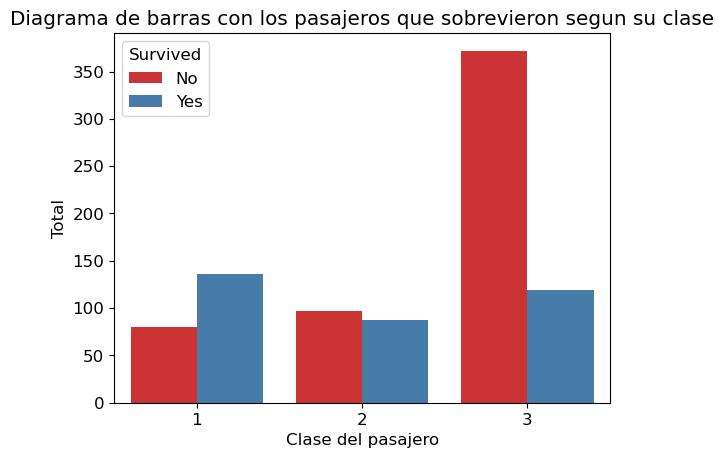

In [15]:
datos.groupby(['Pclass','Survived'])['Survived'].count()
ax=sns.countplot(x='Pclass',hue='Survived',palette='Set1',data=datos)
ax.set(title="Diagrama de barras con los pasajeros que sobrevieron segun su clase",ylabel="Total",xlabel="Clase del pasajero")
plt.show()


Comparacion sobreviventes por genero

In [16]:
datos.groupby(['Sex','Survived'])['Survived'].count()


Sex     Survived
female  No           81
        Yes         233
male    No          468
        Yes         109
Name: Survived, dtype: int64

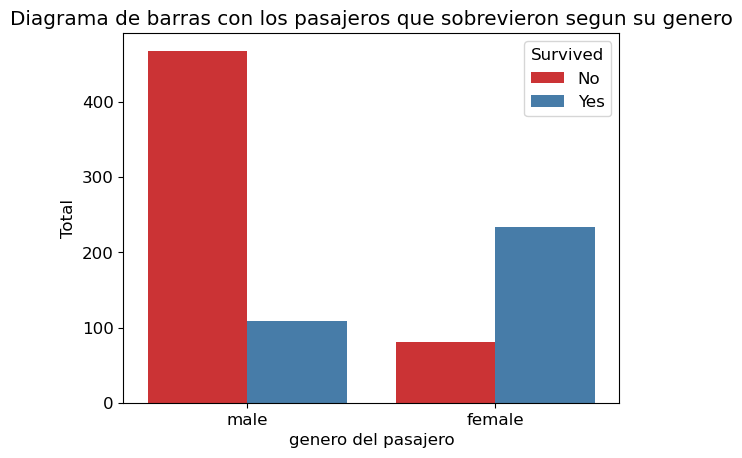

In [17]:
ax=sns.countplot(x='Sex',hue='Survived',palette='Set1',data=datos)
ax.set(title="Diagrama de barras con los pasajeros que sobrevieron segun su genero",ylabel="Total",xlabel="genero del pasajero")

plt.show()

Analisis de pasajeros que sobrevivieron segun su clase y genero

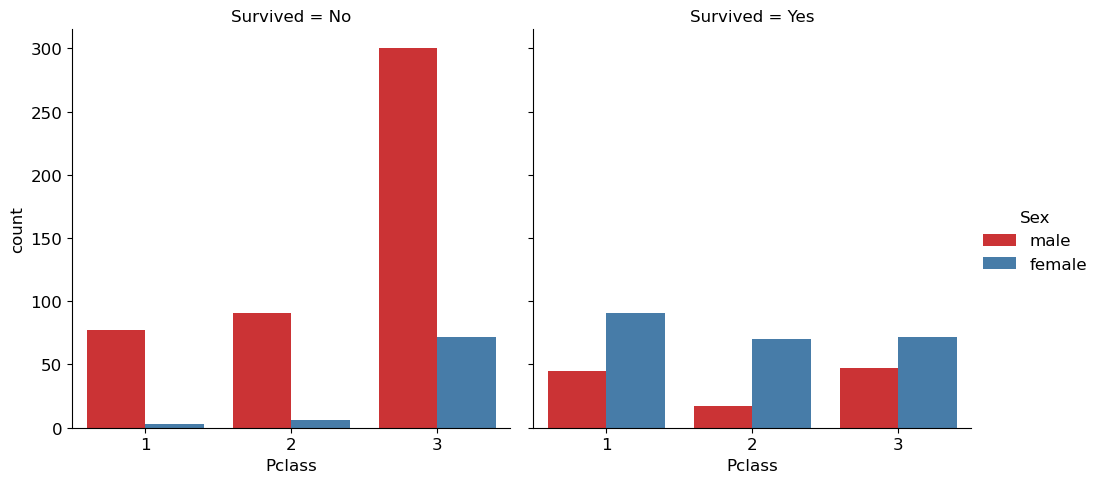

In [18]:
ax=sns.catplot(x='Pclass',hue='Sex',col='Survived',palette='Set1',
                 data=datos,kind='count')
plt.show()

Analizar el promedio de edad de los pasajeros por cabina

In [23]:
aux=datos.pivot_table(values='Age',index='Cabin',aggfunc='mean')
aux

,Age
Cabin,
A10,36.00000
A14,30.00000
A16,48.00000
A19,30.00000
A20,49.00000
...,...
F38,30.00000
F4,2.50000
G6,14.75000


Grafica de dispercion entre la edad y el tarifa de los pasajeros


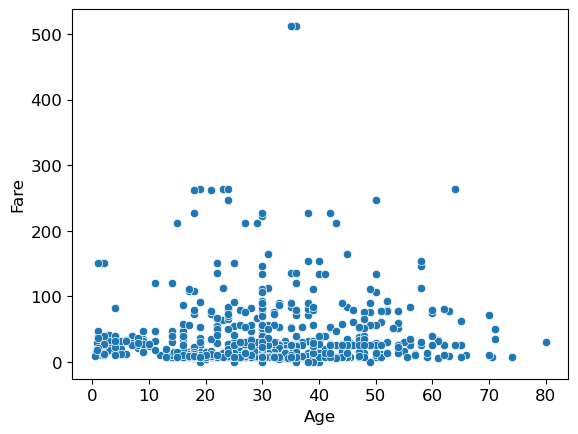

In [26]:
sns.scatterplot(x='Age', y='Fare', data=datos)
plt.show()

Mapa de correlacion entre las variables del titanic

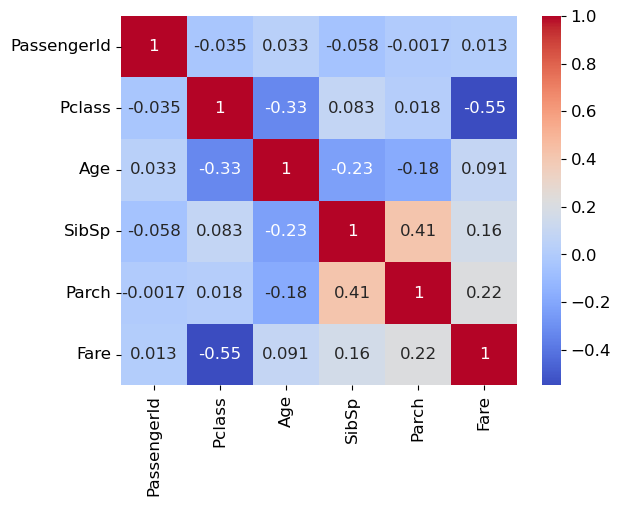

In [27]:
sns.heatmap(datos.corr(), annot=True, cmap='coolwarm')
plt.show()

Se observa que las variables no se enncuentran muy corelacionadas  siendo las mas relacionadas el parch y el fare 

Analisis de pasajeros que sobrevivieron segun su sitio de embarque

In [39]:
tablaCruzada=pd.crosstab(datos['Embarked'], datos['Survived'])
tablaCruzada

Survived,No,Yes
Embarked,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


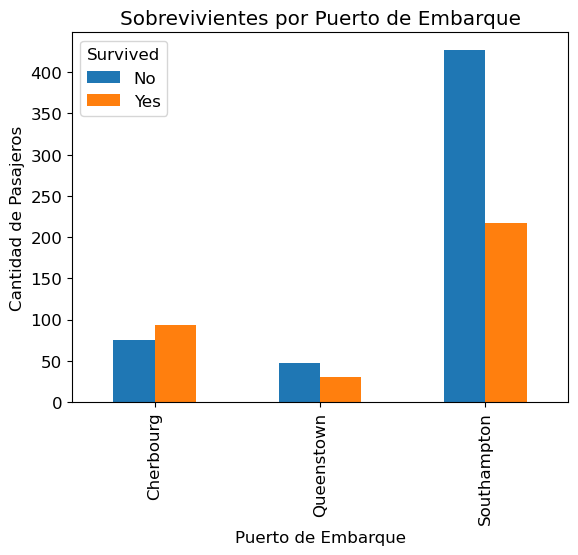

In [45]:
tablaCruzada.plot(kind='bar', stacked=False)
plt.title('Sobrevivientes por Puerto de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Cantidad de Pasajeros')

plt.show()

Analisis pasajeros que eran menores de edad, adultos y ancianos por clase

In [53]:
datos[datos['Age']<18]['Age'].count()

113

In [54]:
intervaloedad1=datos[datos['Age']<18].pivot_table(values='Age',index='Pclass',aggfunc='count')
intervaloedad1

,Age
Pclass,
1,12
2,23
3,78


In [59]:
intervaloedad2=datos[(datos['Age']<18 )& (datos['Age']<=50)].pivot_table(values='Age',index='Pclass',aggfunc='count')
intervaloedad2

,Age
Pclass,
1,12
2,23
3,78


In [60]:
intervaloedad3=datos[datos['Age']>50].pivot_table(values='Age',index='Pclass',aggfunc='count')
intervaloedad3

,Age
Pclass,
1,39
2,15
3,10


Esta es una de las formas de segmentar las edades pero se puede hacer de otra forma

In [110]:
bins = [0, 18, 30, 50, 100]
labels = ['Menores de 18', 'Entre 18 y 30', 'Entre 30 y 50', 'Mayores de 50']
datos['Edad_Rango'] = pd.cut(datos['Age'], bins=bins, labels=labels)


In [100]:
edad_counts = datos['Edad Segmentada'].value_counts()
edad_counts

Adultos Jóvenes    447
Adultos Mayores    241
Adolescentes        70
Niños               69
Ancianos            64
Name: Edad Segmentada, dtype: int64

In [112]:
tabla = pd.crosstab(index=datos['Pclass'], columns=datos['Edad_Rango'])
tabla


Edad_Rango,Menores de 18,Entre 18 y 30,Entre 30 y 50,Mayores de 50
Pclass,,,,
1,16,75,86,39
2,29,78,62,15
3,94,294,93,10


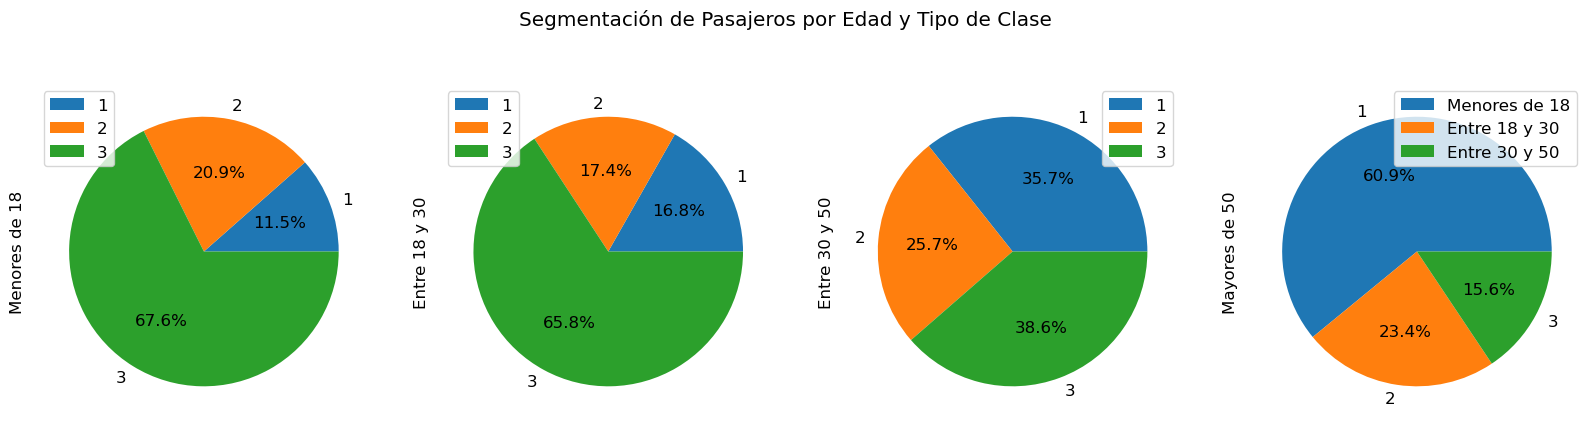

In [115]:
tabla.plot.pie(subplots=True, figsize=(20, 5), autopct='%1.1f%%')
plt.suptitle('Segmentación de Pasajeros por Edad y Tipo de Clase')
plt.legend(loc='upper right', labels=labels)
plt.show()

Agrupar Familias Por apellido


In [172]:
datos['Last Name'] = datos['Name'].str.split(',').str[0]


family_count = datos.groupby('Last Name')['PassengerId'].count()
familiasapellidos=datos['Last Name']

family_count

Last Name
Abbing           1
Abbott           2
Abelson          2
Adahl            1
Adams            1
                ..
de Mulder        1
de Pelsmaeker    1
del Carlo        1
van Billiard     1
van Melkebeke    1
Name: PassengerId, Length: 667, dtype: int64

Mostrar las familias mas grandes que habian en el barco

In [262]:
familias_con_solo_miembro = family_count[family_count ==1]
familias_con_solo_miembro.sum()

534

In [260]:
familias_con_varios_miembros = family_count[family_count > 1]
familias_con_varios_miembros.sum()

357

In [188]:
familias_con_varios_miembros = datos.groupby('Last Name').filter(lambda x: len(x) > 1)
familias_con_varios_miembros = familias_con_varios_miembros.groupby('Last Name').size().reset_index(name='Count')
familias_con_varios_miembros = familias_con_varios_miembros.sort_values(by='Count', ascending=False)
print (familias_con_varios_miembros.head(10))


     Last Name  Count
5    Andersson      9
111       Sage      7
48     Goodwin      6
99      Panula      6
114      Skoog      6
68     Johnson      6
26      Carter      6
106       Rice      5
56      Harris      4
42        Ford      4


Diagrama de torta de la relacion genero clase

In [193]:
tabla = pd.crosstab(datos['Pclass'], datos['Sex'])
tabla

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


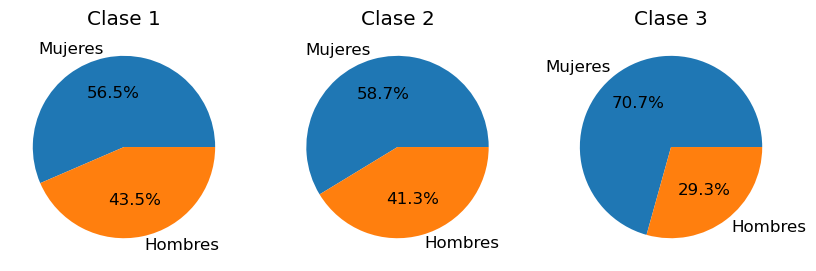

In [205]:

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].pie(datos.loc[datos['Pclass'] == 1, 'Sex'].value_counts(), labels=['Mujeres', 'Hombres'], autopct='%1.1f%%')
axs[0].set_title('Clase 1')
axs[1].pie(datos.loc[datos['Pclass'] == 2, 'Sex'].value_counts(), labels=['Mujeres', 'Hombres'], autopct='%1.1f%%')
axs[1].set_title('Clase 2')
axs[2].pie(datos.loc[datos['Pclass'] == 3, 'Sex'].value_counts(), labels=['Mujeres', 'Hombres'], autopct='%1.1f%%')
axs[2].set_title('Clase 3')


plt.show()


In [207]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Edad Segmentada,Edad_Rango,Last Name
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NE,Southampton,Adultos Jóvenes,Entre 18 y 30,Braund
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adultos Mayores,Entre 30 y 50,Cumings
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NE,Southampton,Adultos Jóvenes,Entre 18 y 30,Heikkinen
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Adultos Mayores,Entre 30 y 50,Futrelle
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NE,Southampton,Adultos Mayores,Entre 30 y 50,Allen


# Prediccion de supervivencia basado en variables

Preparacion de datos y librerias

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Normalizar datos de prueba de la fuente

In [224]:
datosPrueba=pd.read_csv('./dataset/test.csv')
datosPrueba.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [227]:
datosPrueba.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [240]:
promedioEdadesTest=round(datosPrueba['Age'].mean())
datosPrueba['Age']=datosPrueba['Age'].fillna(promedioEdadesTest)
datosPrueba['Cabin']=datosPrueba['Cabin'].fillna('NE')
datosPrueba['Embarked']=datosPrueba['Embarked'].fillna('NE')
datosPrueba['Fare']=datosPrueba['Fare'].fillna(0)


In [241]:
datosPrueba.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Preparar datos separados

In [244]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
X_train = datos[features]
y_train = datos['Survived']

X_test = datosPrueba[features]




Crear y entrenar el modelo de regresión logística

In [245]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Realizar la predicción en el conjunto de prueba y calcular la exactitud del modelo

In [248]:
y_pred = model.predict_proba(X_test)[:,1]
datosPrueba['Survival Probability'] = y_pred
datosPrueba.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival Probability
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NE,Q,0.195649
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NE,S,0.106164
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NE,Q,0.177831
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NE,S,0.245193
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NE,S,0.280578


El modelo con los datos de prueba define el % de sobrevivivencia de un pasajero

Por ejemplo, si se quiere predecir si una mujer de 30 años de edad, de primera clase, que viaja sola y pagó una tarifa de 10 dólares, sobreviviría o no en el Titanic,

In [257]:
new_passenger = [[1, 30, 0, 0, 10]]
prediction = model.predict(new_passenger)
print("La predicción es:", prediction)

La predicción es: ['Yes']


D:\Users\japar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Por ejemplo, si se quiere predecir si una mujer de 20 años de edad, de tercera clase, que tiene  familia en el titanic pero no tiene hijos y pagó una tarifa de 20 dólares, sobreviviría o no en el Titanic,

In [259]:
new_passenger = [[3, 30, 2, 0, 20]]
prediction = model.predict(new_passenger)
print("La predicción es:", prediction)

La predicción es: ['No']


D:\Users\japar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
